In [27]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean as cm
import numpy as np

In [2]:
tw = xr.open_dataset('SalishSea1500-RUN203_1h_grid_T_y1990m04_clipped.nc')

tw_daily =  tw.resample(time_counter="D").mean() 

## data hovmoller, original and resampled


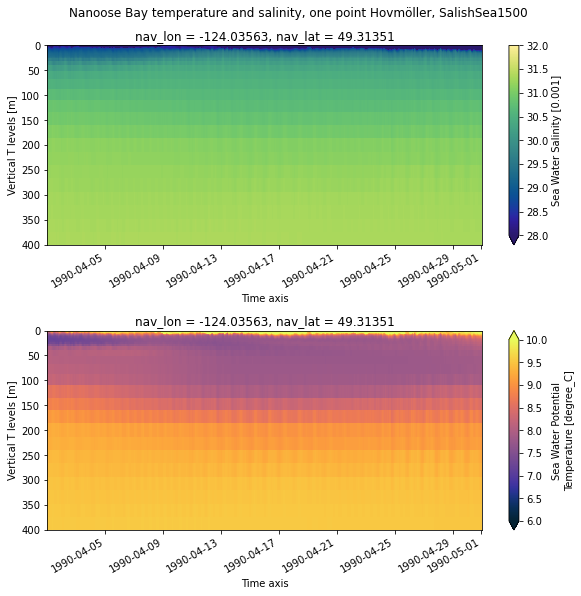

In [3]:
tvmin = 28
tvmax = 32
tcmap = cm.cm.haline


fact =0.7
fig, axs = plt.subplots(2,1, figsize=(12*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

(tw.vosaline.sel(y=10, x=10)).T.plot(ax = axs[0], vmin = tvmin, vmax = tvmax, cmap = tcmap)
axs[0].set_ylim([0,400])
axs[0].invert_yaxis()

tvmin = 6
tvmax = 10
tcmap = cm.cm.thermal
(tw.votemper.sel(y=10, x=10)).T.plot(ax = axs[1], vmin = tvmin, vmax = tvmax, cmap = tcmap)
axs[1].set_ylim([0,400])

axs[1].invert_yaxis()

plt.suptitle('Nanoose Bay temperature and salinity, one point Hovmöller, SalishSea1500')
plt.tight_layout()
#UKESM_1A_pco2.sel(y=slice(0,114)).weighted(ukesm_bylat).mean(dim = ['y']).plot(ax = axs[0], color = 'k', linestyle = '-',\
#                                                                              label = 'UKESM (1A) \n historical ozone, \n SSP2-4.5')

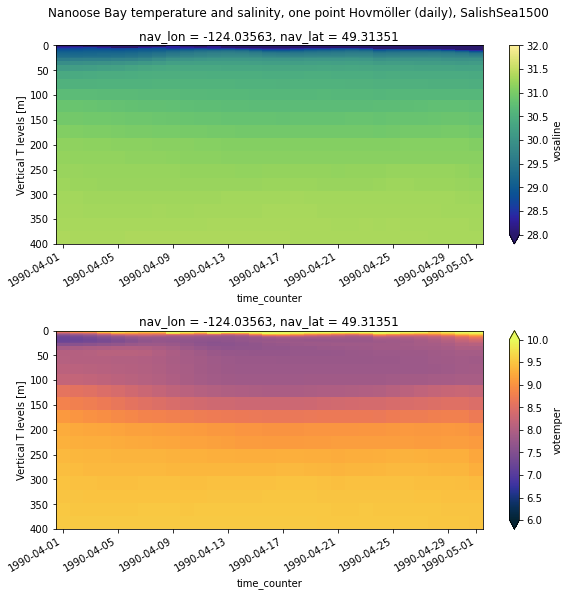

In [19]:
tvmin = 28
tvmax = 32
tcmap = cm.cm.haline


fact =0.7
fig, axs = plt.subplots(2,1, figsize=(12*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

(tw_daily.vosaline.sel(y=10, x=10)).T.plot(ax = axs[0], vmin = tvmin, vmax = tvmax, cmap = tcmap)
axs[0].set_ylim([0,400])
axs[0].invert_yaxis()

tvmin = 6
tvmax = 10
tcmap = cm.cm.thermal
(tw_daily.votemper.sel(y=10, x=10)).T.plot(ax = axs[1], vmin = tvmin, vmax = tvmax, cmap = tcmap)
axs[1].set_ylim([0,400])

axs[1].invert_yaxis()

plt.suptitle('Nanoose Bay temperature and salinity, one point Hovmöller (daily), SalishSea1500')
plt.tight_layout()
#UKESM_1A_pco2.sel(y=slice(0,114)).weighted(ukesm_bylat).mean(dim = ['y']).plot(ax = axs[0], color = 'k', linestyle = '-',\
#                                                                              label = 'UKESM (1A) \n historical ozone, \n SSP2-4.5')


### here's a very small pipeline for daily resampling (keeping x and y coordinate dimensions for now)

- I've duplicated the file in a folder called clippedData, and made a subfolder called monthlyResampled where the resampled daily files can go

In [21]:
import glob
import xarray as xr

verbose = True #if verbose, will print what it's doing

#filepath (wildcarded) to raw (clipped) data
fpath = '/gpfs/home/mep22dku/scratch/NanooseObs/clippedData/'

tfiles = glob.glob(f'{fpath}*.nc')


for tfile in tfiles:
    
    if verbose:
        print(f'file is: {tfile}')

    fname =  tfile.split(fpath)[1]
    fname = fname.replace("1h", "1d")
    fname = fname.replace("clipped", "clippedResampled")
    newfname = f'{fpath}/monthlyResampled/{fname}'   #new path including monthlyResampled 
    
    if verbose:
        print('new file saved at:')
        print(newfname)
    
    tdat = xr.open_dataset(tfile)
    tdat_daily =  tdat.resample(time_counter="D").mean() #resample daily and save to new location
    tdat_daily.to_netcdf(newfname)


file is: /gpfs/home/mep22dku/scratch/NanooseObs/clippedData/SalishSea1500-RUN203_1h_grid_T_y1990m04_clipped.nc
new file saved at:
/gpfs/home/mep22dku/scratch/NanooseObs/clippedData//monthlyResampled/SalishSea1500-RUN203_1d_grid_T_y1990m04_clippedResampled.nc


## how spatially variable is this data? (not weighted, would need mesh mask to do this nicely)

<xarray.Dataset>
Dimensions:       (bnds: 2, deptht: 40, nvertex: 4, time_counter: 31, x: 30, y: 23)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1990-04-01 ... 1990-05-01
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
  * deptht        (deptht) float32 0.5000003 1.5000031 ... 414.5341 441.4661
Dimensions without coordinates: bnds, nvertex, x, y
Data variables:
    nav_lon_bnds  (time_counter, y, x, nvertex) float32 ...
    nav_lat_bnds  (time_counter, y, x, nvertex) float32 ...
    deptht_bnds   (time_counter, deptht, bnds) float32 ...
    votemper      (time_counter, deptht, y, x) float32 ...
    vosaline      (time_counter, deptht, y, x) float32 ...


/gpfs/home/mep22dku/.conda/envs/swamp2/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice
/gpfs/home/mep22dku/.conda/envs/swamp2/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/gpfs/home/mep22dku/.conda/envs/swamp2/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice


(31, 40)


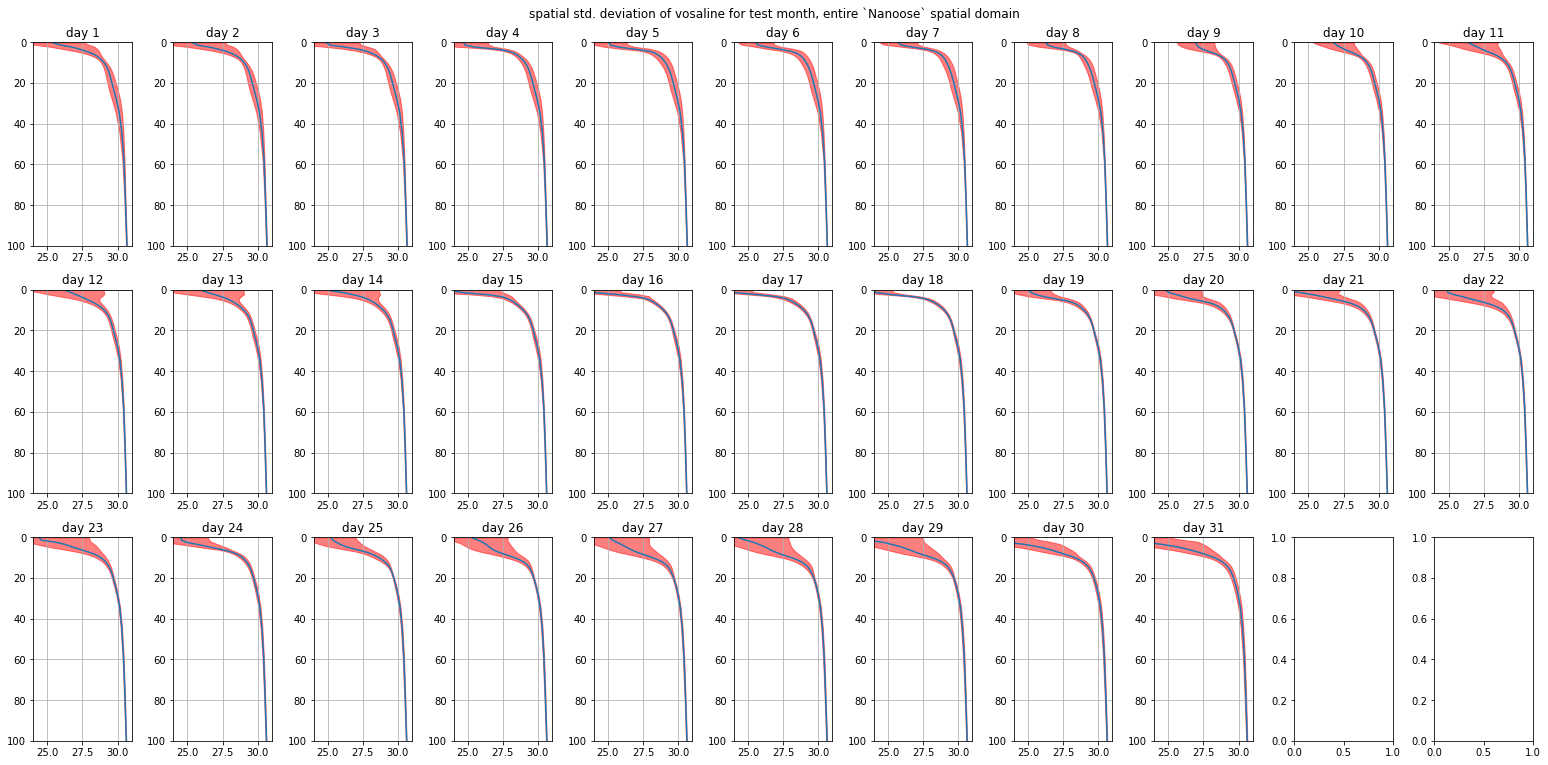

In [56]:
tdat = xr.open_dataset(newfname)
print(tdat)

temp = tdat['votemper'].values
salt = tdat['vosaline'].values
temp[temp == 0] = np.nan
salt[salt == 0] = np.nan

salt_mean = np.zeros([31,40])
temp_mean = np.zeros([31,40])
salt_std = np.zeros([31,40])
temp_std = np.zeros([31,40])

for i in range(0,31):
    for d in range(0,40):
        ttemp = temp[i,d,:,:]
        temp_mean[i,d] = np.nanmean(ttemp)
        temp_std[i,d] = np.nanstd(ttemp)
        tsalt = salt[i,d,:,:]
        salt_mean[i,d] = np.nanmean(tsalt)
        salt_std[i,d] = np.nanstd(tsalt)


print(np.shape(salt_mean))

fact =0.9
fig, axs = plt.subplots(3,11, figsize=(24*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,31):
    axs[i].plot(salt_mean[i,:],tdat['deptht'])
    axs[i].fill_betweenx(tdat['deptht'],salt_mean[i,:]-salt_std[i,:],salt_mean[i,:]+salt_std[i,:], alpha = 0.5, color = 'r')
    axs[i].set_ylim([0,100])
    axs[i].invert_yaxis()
    axs[i].set_title(f'day {i+1}')
    axs[i].set_xlim([24,31])
    axs[i].grid()
    
plt.suptitle('spatial std. deviation of vosaline for test month, entire `Nanoose` spatial domain')
plt.tight_layout()

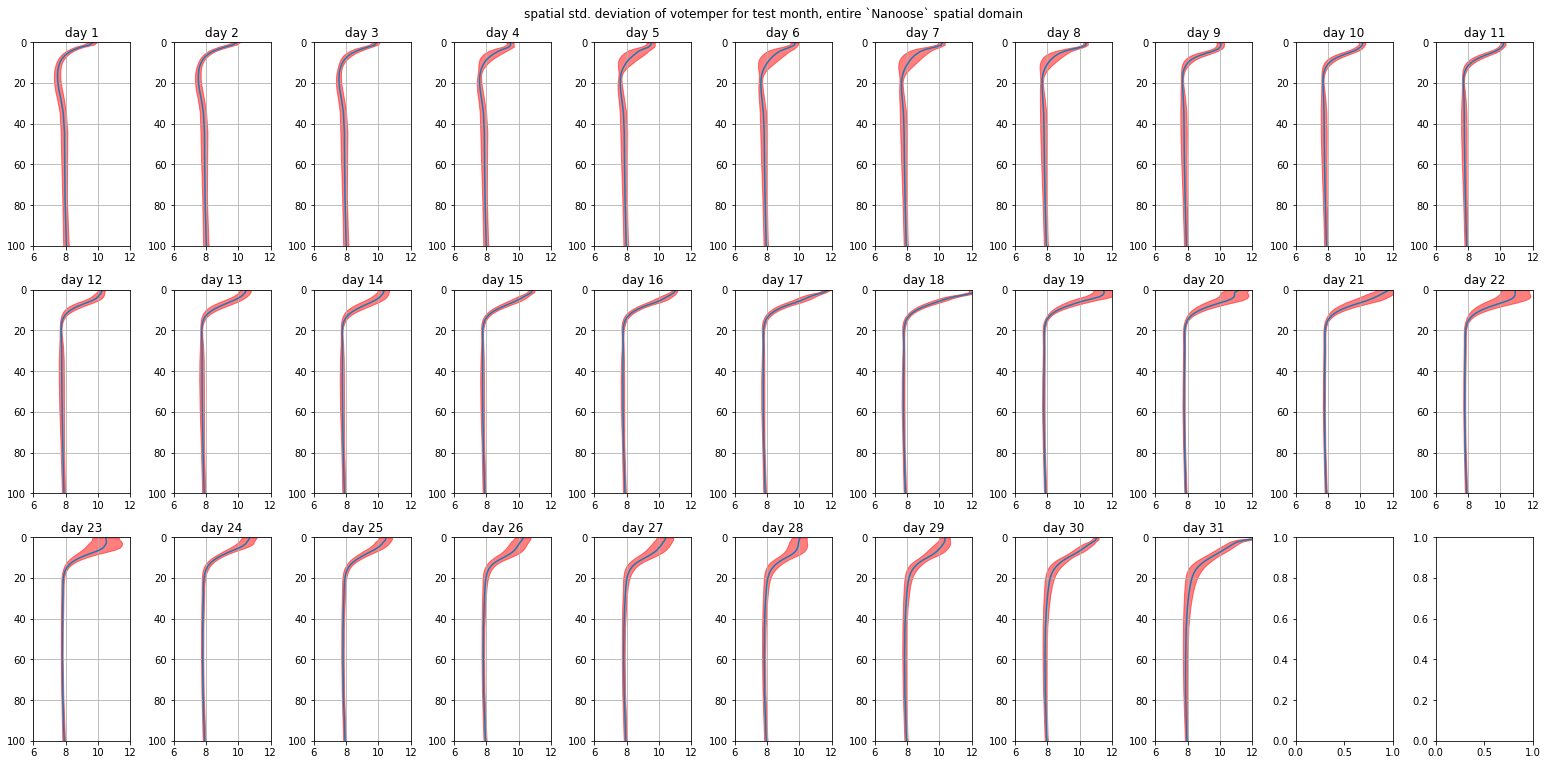

In [57]:
fact =0.9
fig, axs = plt.subplots(3,11, figsize=(24*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,31):
    axs[i].plot(temp_mean[i,:],tdat['deptht'])
    axs[i].fill_betweenx(tdat['deptht'],temp_mean[i,:]-temp_std[i,:],temp_mean[i,:]+temp_std[i,:], alpha = 0.5, color = 'r')
    axs[i].set_ylim([0,100])
    axs[i].invert_yaxis()
    axs[i].set_title(f'day {i+1}')
    axs[i].set_xlim([6,12])
    axs[i].grid()
    
plt.suptitle('spatial std. deviation of votemper for test month, entire `Nanoose` spatial domain')
plt.tight_layout()